In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from sklearn.metrics import accuracy_score
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
train_folder = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\crop_dataset\crop_dataset"
test_folder = r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_data\test_data"

train_class_folders = os.listdir(train_folder)

# Dictionary for naming the class types

classes = {0: 'Speed limit (20km/h)',
           1: 'Speed limit (30km/h)',
           2: 'Speed limit (50km/h)',
           3: 'Speed limit (60km/h)',
           4: 'Speed limit (70km/h)',
           5: 'Speed limit (80km/h)',
           6: 'End of speed limit (80km/h)',
           7: 'Speed limit (100km/h)',
           8: 'Speed limit (120km/h)',
           9: 'No passing',
           10: 'No passing veh over 3.5 tons',
           11: 'Right-of-way at intersection',
           12: 'Priority road',
           13: 'Yield',
           14: 'Stop',
           15: 'No vehicles',
           16: 'Veh > 3.5 tons prohibited',
           17: 'No entry',
           18: 'General caution',
           19: 'Dangerous curve left',
           20: 'Dangerous curve right',
           21: 'Double curve',
           22: 'Bumpy road',
           23: 'Slippery road',
           24: 'Road narrows on the right',
           25: 'Road work',
           26: 'Traffic signals',
           27: 'Pedestrians',
           28: 'Children crossing',
           29: 'Bicycles crossing',
           30: 'Beware of ice/snow',
           31: 'Wild animals crossing',
           32: 'End speed + passing limits',
           33: 'Turn right ahead',
           34: 'Turn left ahead',
           35: 'Ahead only',
           36: 'Go straight or right',
           37: 'Go straight or left',
           38: 'Keep right',
           39: 'Keep left',
           40: 'Roundabout mandatory',
           41: 'End of no passing',
           42: 'End no passing veh > 3.5 tons'}

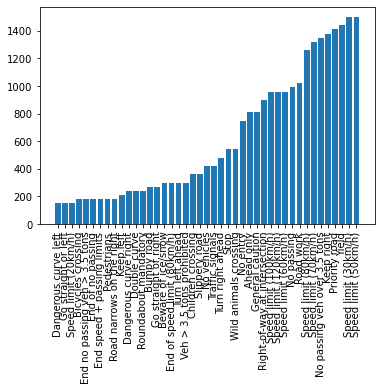

In [3]:
# Get number of instances per class and visualize the data

train_numberOfInstancesPerClass = []
class_names = []

for folder in train_class_folders:
    train_files = os.listdir(train_folder + '/' + folder)
    train_numberOfInstancesPerClass.append(len(train_files))
    class_names.append(classes[int(folder)])

pairs = zip(train_numberOfInstancesPerClass, class_names)
pairs = sorted(pairs)
tuples = zip(*pairs)
train_numberOfInstancesPerClass, class_names = [
    list(tuple) for tuple in tuples]

plt.bar(class_names, train_numberOfInstancesPerClass)
plt.xticks(class_names, rotation='vertical')
plt.show()

In [4]:
# Creating image data and label arrs for training/validation sets

images = []
labels = []

for imgClass in range(len(classes)):
    imgFolder_path = train_folder + "\\" + str(imgClass).zfill(5)
    #print(imgFolder_path)
    imgFolder = os.listdir(imgFolder_path)

    for img in imgFolder:
        image = plt.imread(imgFolder_path + "\\" + img)  # get an image
        image = Image.fromarray(image, 'RGB')
        image = image.resize((32, 32))  # resize all images to same size
        images.append(np.array(image))
        labels.append(imgClass)

images = np.array(images)
labels = np.array(labels)

In [5]:
# Shuffle the dataset

shuffle_indexes = np.arange(images.shape[0])
np.random.shuffle(shuffle_indexes)
images = images[shuffle_indexes]
labels = labels[shuffle_indexes]

In [6]:
# Create the training and validation sets 

x_train, x_val, y_train, y_val = train_test_split(
    images, labels, test_size=0.3, shuffle=True)

x_train = x_train/255
x_val = x_val/255  # !!!! WHY?

# Convert classes to one-hot vectors
y_train = keras.utils.to_categorical(y_train, len(classes))
y_val = keras.utils.to_categorical(y_val, len(classes))

In [7]:
# Load the test data and create the test sets

test_csv = pd.read_csv(r"C:\Users\ŞeymaÇakmak\Desktop\BİL 468\Project\Project Code\Dataset MAIN\test_labels.csv")
labels = test_csv['label'].values  # y_test
images = test_csv['image'].values
x_test = []

for imagePath in images:
    image = plt.imread(test_folder+ "\\" + imagePath)
    image = Image.fromarray(image, 'RGB')
    image = image.resize((32, 32))
    x_test.append(np.array(image))

x_test = np.array(x_test)
x_test = x_test/255

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models


# 2. LeNet-5 Modeli Oluşturma
model = models.Sequential()

# Evrişim Katmanı 1
# Evrişim Katmanı 1
model.add(layers.Conv2D(6, kernel_size=(5, 5), strides=(1, 1), activation='tanh', input_shape=(32, 32, 3), padding='same'))
# Havuzlama Katmanı 1
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Evrişim Katmanı 2
model.add(layers.Conv2D(16, kernel_size=(5, 5), strides=(1, 1), activation='tanh', padding='valid'))
# Havuzlama Katmanı 2
model.add(layers.AveragePooling2D(pool_size=(2, 2), strides=(2, 2), padding='valid'))

# Tam Bağlantı Katmanı 1
model.add(layers.Flatten())
model.add(layers.Dense(120, activation='tanh'))

# Tam Bağlantı Katmanı 2
model.add(layers.Dense(84, activation='tanh'))

# Çıkış Katmanı
model.add(layers.Dense(43, activation='softmax'))  # 43 sınıflı çıkış

# Modeli Derleme
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Modeli Eğitme
history = model.fit(x_train, y_train, epochs=10, validation_data=(x_val, y_val))



C:\Users\ŞeymaÇakmak\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - accuracy: 0.5360 - loss: 1.8345 - val_accuracy: 0.9396 - val_loss: 0.2955
Epoch 2/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9533 - loss: 0.2282 - val_accuracy: 0.9661 - val_loss: 0.1643
Epoch 3/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - accuracy: 0.9771 - loss: 0.1100 - val_accuracy: 0.9728 - val_loss: 0.1284
Epoch 4/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9860 - loss: 0.0676 - val_accuracy: 0.9791 - val_loss: 0.0966
Epoch 5/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9917 - loss: 0.0462 - val_accuracy: 0.9805 - val_loss: 0.0873
Epoch 6/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9950 - loss: 0.0292 - val_accuracy: 0.9809 - val_loss: 0.0838
Epoch 7/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9965 - loss: 0.0216 - val_accuracy: 0.9821 - val_loss: 0.0777
Epoch 8/10
583/583 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.9982 - loss: 0.0137 - val_accuracy: 

In [9]:
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels)


In [10]:
# Modeli Değerlendirme
test_loss, test_acc = model.evaluate(x_test, labels_one_hot)
print('Test accuracy:', test_acc)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9110 - loss: 0.4185
Test accuracy: 0.906571626663208


In [11]:
from tensorflow.keras.models import load_model
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import numpy as np

# 'vgg_model_unfreeze_2block' adlı eğitilmiş modelinizin yüklendiği varsayılıyor.
# Eğer bir dosyaya kaydedilmişse, yükleyebilirsiniz: model = load_model('sizin_modelinizin_yolu.h5')
from keras.utils import to_categorical

labels_one_hot = to_categorical(labels)

# Adım 1: Olasılıkları tahmin edin ve sınıf etiketlerine dönüştürün
tahminler = model.predict(x_test)  # Olasılıkları tahmin edin
tahmin_edilen_sınıflar = np.argmax(tahminler, axis=1)  # Olasılıkları sınıf etiketlerine dönüştürün

# Adım 2: Gerekiyorsa one-hot kodlu etiketleri sınıf etiketlerine dönüştürün
gerçek_sınıflar = np.argmax(labels_one_hot, axis=1)  # One-hot kodlu etiketleri sınıf etiketlerine dönüştürün

# Adım 3: Metrikleri Hesapla
macro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')
macro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='macro')

micro_precision = precision_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_recall = recall_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')
micro_f1_score = f1_score(gerçek_sınıflar, tahmin_edilen_sınıflar, average='micro')

karışıklık_matrisi = confusion_matrix(gerçek_sınıflar, tahmin_edilen_sınıflar)

# Sonuçları Göster
print("Macro-Ortalama Kesinlik:", macro_precision)
print("Macro-Ortalama Duyarlılık:", macro_recall)
print("Macro-Ortalama F1 Skoru:", macro_f1_score)
print("\nMikro-Ortalama Kesinlik:", micro_precision)
print("Mikro-Ortalama Duyarlılık:", micro_recall)
print("Mikro-Ortalama F1 Skoru:", micro_f1_score)


395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Macro-Ortalama Kesinlik: 0.8896965462565893
Macro-Ortalama Duyarlılık: 0.8648260066900106
Macro-Ortalama F1 Skoru: 0.8724085681099656

Mikro-Ortalama Kesinlik: 0.9065716547901821
Mikro-Ortalama Duyarlılık: 0.9065716547901821
Mikro-Ortalama F1 Skoru: 0.9065716547901821


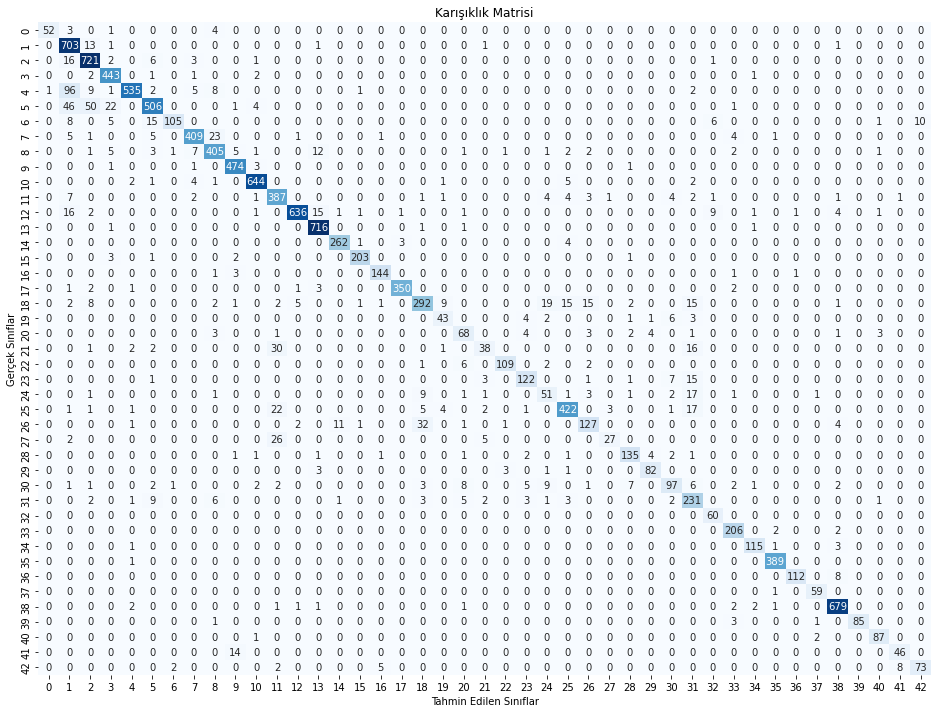

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Karışıklık matrisini görselleştirme
plt.figure(figsize=(16, 12))
sns.heatmap(karışıklık_matrisi, annot=True, cmap="Blues", fmt="d", cbar=False)
plt.title("Karışıklık Matrisi")
plt.xlabel("Tahmin Edilen Sınıflar")
plt.ylabel("Gerçek Sınıflar")
plt.show()
